# <h1 style='background:#1E3A5F; color:white; text-align:center; padding:10px; border-radius:10px;'> Google Stock Price Prediction using LSTM</h1>  

## <h2 style='background:#1E3A5F; color:white; text-align:center; padding:8px; border-radius:8px;'> INDEX </h2>  

<div style="font-size:18px; font-weight:bold; color:#1E3A5F; padding:10px;">

- [1. What is LSTM?](#1)  
- [2. Importing Libraries](#2)  
- [3. Loading Dataset](#3)  
- [4. Exploratory Data Analysis (EDA)](#4)  
- [5. Building Model](#5)  
- [6. Prediction](#6)  
- [7. Visualizing the Predictions](#7)  
- [8. Evaluating the Model](#8)  

</div>

<a id="1"></a>
<h1 style='background:#1E3A5F; color:white; text-align:center; padding:10px; border-radius:10px;'>1. What is LSTM?</h1> 



* ###  Long short-term memory is an artificial recurrent neural network architecture used in the field of deep learning. Unlike standard feed forward neural networks, LSTM has feedback connections. It can process not only single data points, but also entire sequences of data.

* ### Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems. This is a behavior required in complex problem domains like machine translation, speech recognition, and more. LSTMs are a complex area of deep learning.

* ### LSTMs are often referred to as fancy RNNs. Vanilla RNNs do not have a cell state. They only have hidden states and those hidden states serve as the memory for RNNs. Meanwhile, LSTM has both cell states and a hidden states.

##### About Keras
    
    Keras is a high-level neural networks API that simplifies the process of building and training deep learning models. Integrated with TensorFlow 2.x as tf.keras, it offers a user-friendly, modular interface for designing and implementing models. Keras supports quick prototyping with pre-built models and custom layers, and it provides utilities for handling and preprocessing data. Its ease of use and flexibility make it ideal for both beginners and experienced practitioners working on various machine learning tasks.

<a id="2"></a>
<h1 style='background:#1E3A5F; color:white; text-align:center; padding:10px; border-radius:10px;'>2. Importing Libraries</h1> 


In [1]:
# Importing all Require Libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

<a id="3"></a>
<h1 style='background:#1E3A5F; color:white; text-align:center; padding:10px; border-radius:10px;'>3. Loading Dataset</h1> 


In [3]:
# Load the datasets
train_df = pd.read_csv('Google_Stock_Price_Train.csv')
test_df = pd.read_csv('Google_Stock_Price_Test.csv')

    About the DataSet 
        Date: The specific trading day for which the data is recorded. This column 
              helps in tracking the performance of the stock over time.

        Open: The price at which the stock first traded upon the opening of the market 
              on a given day. It indicates the initial trading price.

        High: The highest price at which the stock traded during the day. This value shows 
              the peak trading price within the given day.

        Low: The lowest price at which the stock traded during the day. This value indicates 
              the bottom trading price for the day.

        Close: The price at which the stock last traded upon the close of the market on a given day. 
              This is often used to analyze the stock’s performance and trends.

        Volume: The total number of shares traded during the day. It indicates the level of activity 
              or liquidity in the stock.

In [4]:
train = pd.read_csv('Google_Stock_Price_Train.csv')

In [5]:
prev_data = train_df.tail(80)

In [6]:
# print(train_df.shape)
print(f"There are {train_df.shape[1]} Columns and {train_df.shape[0]} Rows in the Training dataset")
print(f"There are {test_df.shape[1]} Columns and {test_df.shape[0]} Rows in the Testing dataset")

There are 6 Columns and 1258 Rows in the Training dataset
There are 6 Columns and 20 Rows in the Testing dataset


In [7]:
# Display the first few rows of the training dataset
train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
# Display the first few rows of the test dataset
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [9]:
train_df.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [10]:
test_df.tail()

,Date,Open,High,Low,Close,Volume
15,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"
16,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
17,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
18,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600"
19,1/31/2017,796.86,801.25,790.52,796.79,"2,160,600"


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [13]:
# Convert the 'Date' column to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [14]:
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [15]:
#Removing the ',' from 'Close' and 'Volume', so that it can be then converted to float format from Object
train_df['Close'] = train_df['Close'].str.replace(',','')
train_df['Volume'] = train_df['Volume'].str.replace(',','')

# Convert the 'Close'and 'Volume column to float format
train_df['Close'] = train_df['Close'].astype(float)
train_df['Volume'] = train_df['Volume'].astype(int)

In [16]:
# Doing the same process for test_df as well to change datatype

test_df['Volume'] = test_df['Volume'].str.replace(',','')


test_df['Volume'] = test_df['Volume'].astype(int)

In [17]:
# Display summary statistics
train_df.describe()

,Date,Open,High,Low,Close,Volume
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,2014-07-03 20:00:45.786963456,533.709833,537.880223,529.007409,712.669666,3.158107e+06
min,2012-01-03 00:00:00,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,2013-04-05 18:00:00,404.115000,406.765000,401.765000,576.740000,1.621700e+06
50%,2014-07-05 00:00:00,537.470000,540.750000,532.990000,695.675000,2.566150e+06
75%,2015-10-01 18:00:00,654.922500,662.587500,644.800000,782.105000,4.122500e+06
max,2016-12-30 00:00:00,816.680000,816.680000,805.140000,1216.830000,2.497790e+07
std,NaN,151.904442,153.008811,150.552807,164.752591,2.273726e+06


In [18]:
test_df.describe()

,Date,Open,High,Low,Close,Volume
count,20,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,2017-01-16 15:36:00,807.526000,811.926500,801.949500,807.904500,1.659895e+06
min,2017-01-03 00:00:00,778.810000,789.630000,775.800000,786.140000,9.193000e+05
25%,2017-01-09 18:00:00,802.965000,806.735000,797.427500,802.282500,1.248500e+06
50%,2017-01-17 12:00:00,806.995000,808.640000,801.530000,806.110000,1.418050e+06
75%,2017-01-24 06:00:00,809.560000,817.097500,804.477500,810.760000,1.743400e+06
max,2017-01-31 00:00:00,837.810000,841.950000,827.010000,835.670000,3.246600e+06
std,NaN,15.125428,14.381198,13.278607,13.210088,6.774747e+05


In [19]:
# check for missing values
train_df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [20]:
test_df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Open    1258 non-null   float64       
 2   High    1258 non-null   float64       
 3   Low     1258 non-null   float64       
 4   Close   1258 non-null   float64       
 5   Volume  1258 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 54.2 KB


In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20 non-null     datetime64[ns]
 1   Open    20 non-null     float64       
 2   High    20 non-null     float64       
 3   Low     20 non-null     float64       
 4   Close   20 non-null     float64       
 5   Volume  20 non-null     int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 1012.0 bytes


<a id="4"></a>
<h1 style='background:#1E3A5F; color:white; text-align:center; padding:10px; border-radius:10px;'>4. Exploratory Data Analysis (EDA)</h1> 



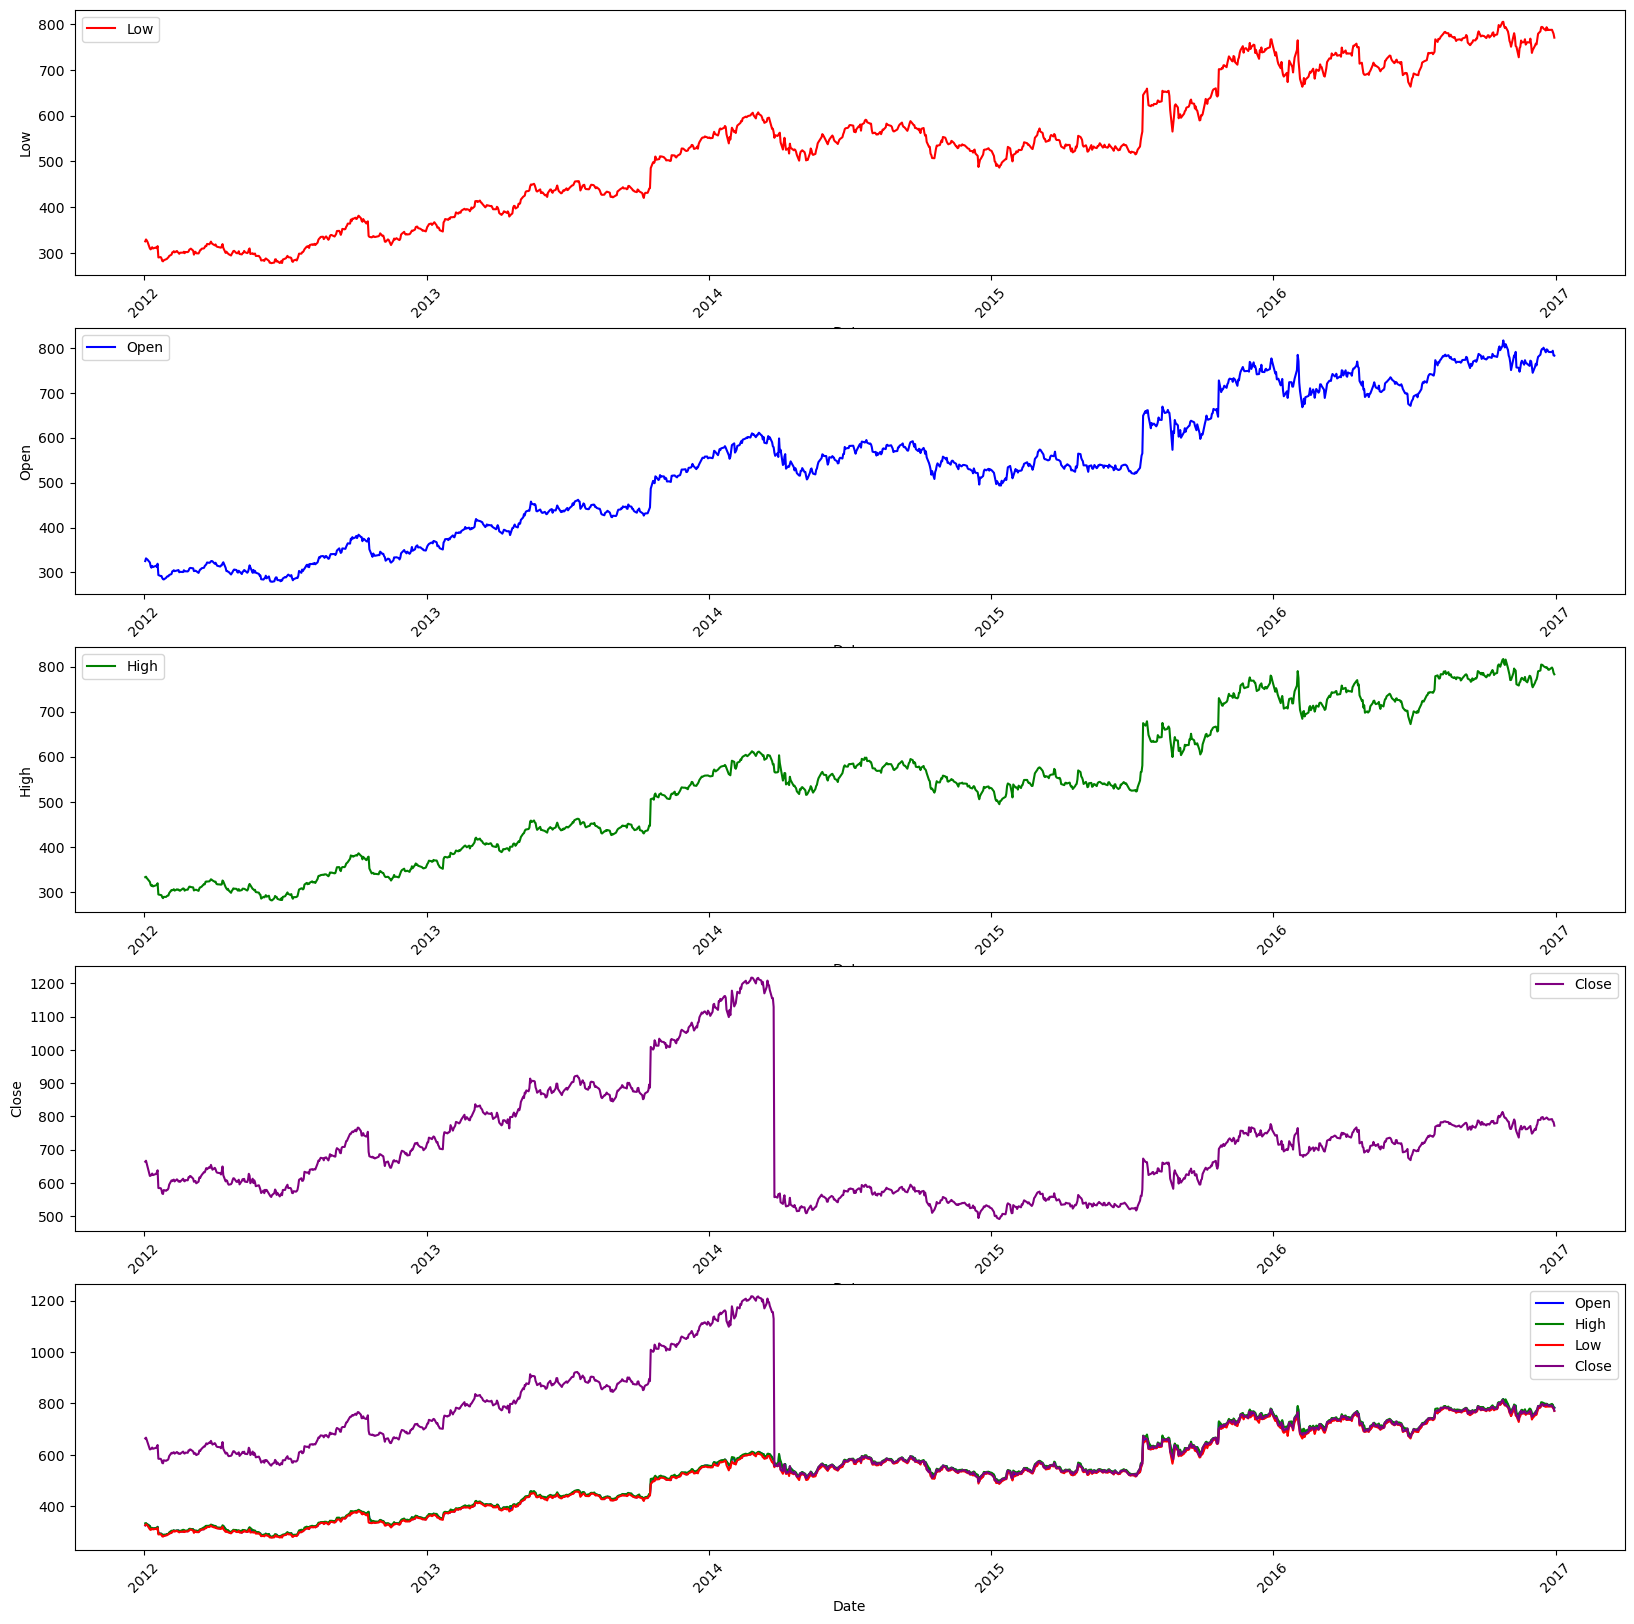

In [23]:
# Visualize the 'Open', 'High', 'Low', and 'Close' prices over time.

# Plot the prices over time

plt.figure(figsize = (20,20))
plt.subplot(5, 1, 1)
sns.lineplot(x = train_df["Date"], y = train_df["Low"], label = 'Low', color = 'red')
plt.xticks(rotation = 45)
plt.subplot(5, 1, 2)
sns.lineplot(x = train_df["Date"], y = train_df["Open"], label = 'Open', color = 'blue')
plt.xticks(rotation = 45)
plt.subplot(5, 1, 3)
sns.lineplot(x = train_df["Date"], y = train_df["High"], label = 'High', color = 'green')
plt.xticks(rotation = 45)
plt.subplot(5, 1, 4)
sns.lineplot(x = train_df["Date"], y = train_df["Close"], label = 'Close', color = 'purple')
plt.xticks(rotation = 45)
plt.subplot(5, 1, 5)
sns.lineplot(x = train_df["Date"], y = train_df["Open"], label = 'Open', color = 'blue')
sns.lineplot(x = train_df["Date"], y = train_df["High"], label = 'High', color = 'green')
sns.lineplot(x = train_df["Date"], y = train_df["Low"], label = 'Low', color = 'red')
sns.lineplot(x = train_df["Date"], y = train_df["Close"], label = 'Close', color = 'purple')
plt.xticks(rotation = 45)
plt.ylabel(None)
plt.show()

- Trend: The stock prices show an upward trend over the time period with noticeable fluctuations.


##### There is a discrepancy in the data as the 'Close' of stock is almost double than its 'Open' price according to this Data set.
##### This discrepancy is Uptil the index of 559.
##### For reference you may run the below code:


In [24]:
#train_df[['Date','Open','Close']]

#### Now as we know that there is discrepancy in the data, and watching the trend we can figure that the closing price is almost double so we can divide that data by 2 to normalize and balance the data.
#### The code for balancing is written below:

In [25]:
train_df['Close'].iloc[:560] = train_df['Close'].iloc[:560] / 2

In [26]:
train_df.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,331.795,7380500
1,2012-01-04,331.27,333.87,329.08,333.225,5749400
2,2012-01-05,329.83,330.75,326.89,328.605,6590300
3,2012-01-06,328.34,328.77,323.68,324.120,5405900
4,2012-01-09,322.04,322.29,309.46,310.380,11688800


In [27]:
train_df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

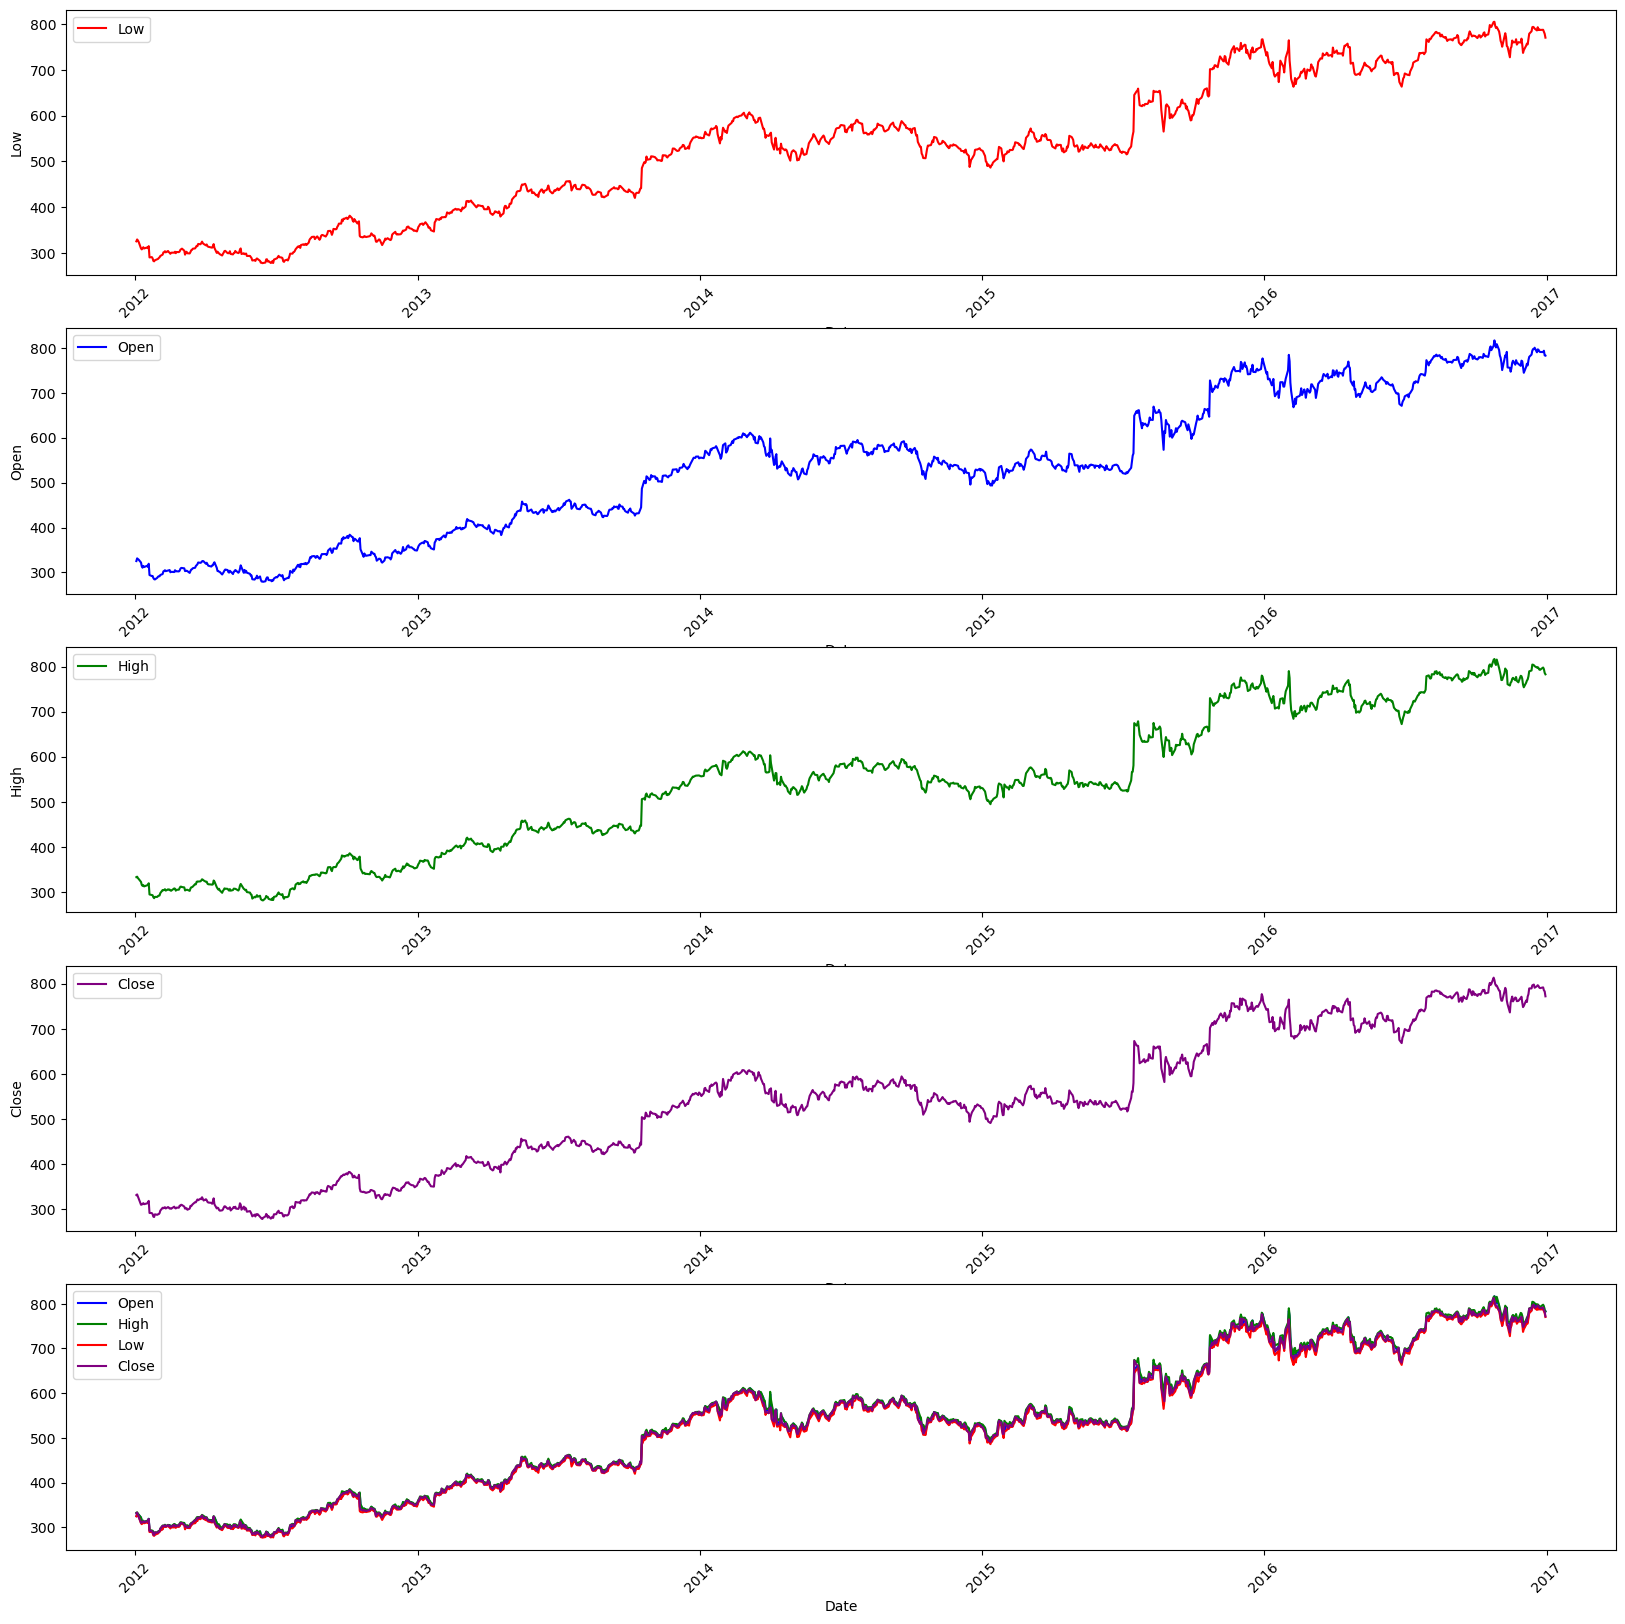

In [28]:
# Now plotting the overtime graph again after managing the discrepancy

plt.figure(figsize = (20,20))
plt.subplot(5, 1, 1)
sns.lineplot(x = train_df["Date"], y = train_df["Low"], label = 'Low', color = 'red')
plt.xticks(rotation = 45)
plt.subplot(5, 1, 2)
sns.lineplot(x = train_df["Date"], y = train_df["Open"], label = 'Open', color = 'blue')
plt.xticks(rotation = 45)
plt.subplot(5, 1, 3)
sns.lineplot(x = train_df["Date"], y = train_df["High"], label = 'High', color = 'green')
plt.xticks(rotation = 45)
plt.subplot(5, 1, 4)
sns.lineplot(x = train_df["Date"], y = train_df["Close"], label = 'Close', color = 'purple')
plt.xticks(rotation = 45)
plt.subplot(5, 1, 5)
sns.lineplot(x = train_df["Date"], y = train_df["Open"], label = 'Open', color = 'blue')
sns.lineplot(x = train_df["Date"], y = train_df["High"], label = 'High', color = 'green')
sns.lineplot(x = train_df["Date"], y = train_df["Low"], label = 'Low', color = 'red')
sns.lineplot(x = train_df["Date"], y = train_df["Close"], label = 'Close', color = 'purple')
plt.xticks(rotation = 45)
plt.ylabel(None)
plt.show()

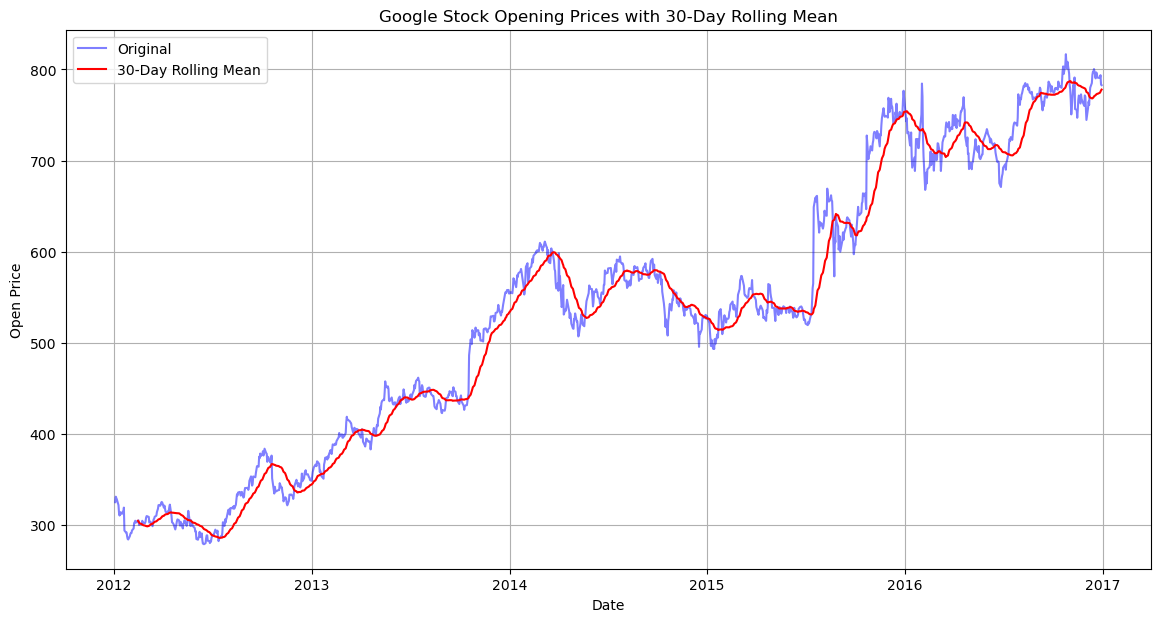

In [29]:
# Plotting the rolling average
plt.figure(figsize=(14, 7))
plt.plot(train_df['Date'], train_df['Open'], label='Original', color='blue', alpha=0.5)
plt.plot(train_df['Date'], train_df['Open'].rolling(window=30).mean(), label='30-Day Rolling Mean', color='red')
plt.title('Google Stock Opening Prices with 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)
plt.show()


- Smoothed Trend: The rolling average smooths out the short-term fluctuations and highlights the long-term trend.
- Deviation: Points where the actual price deviates significantly from the rolling average could indicate market events or anomalies.

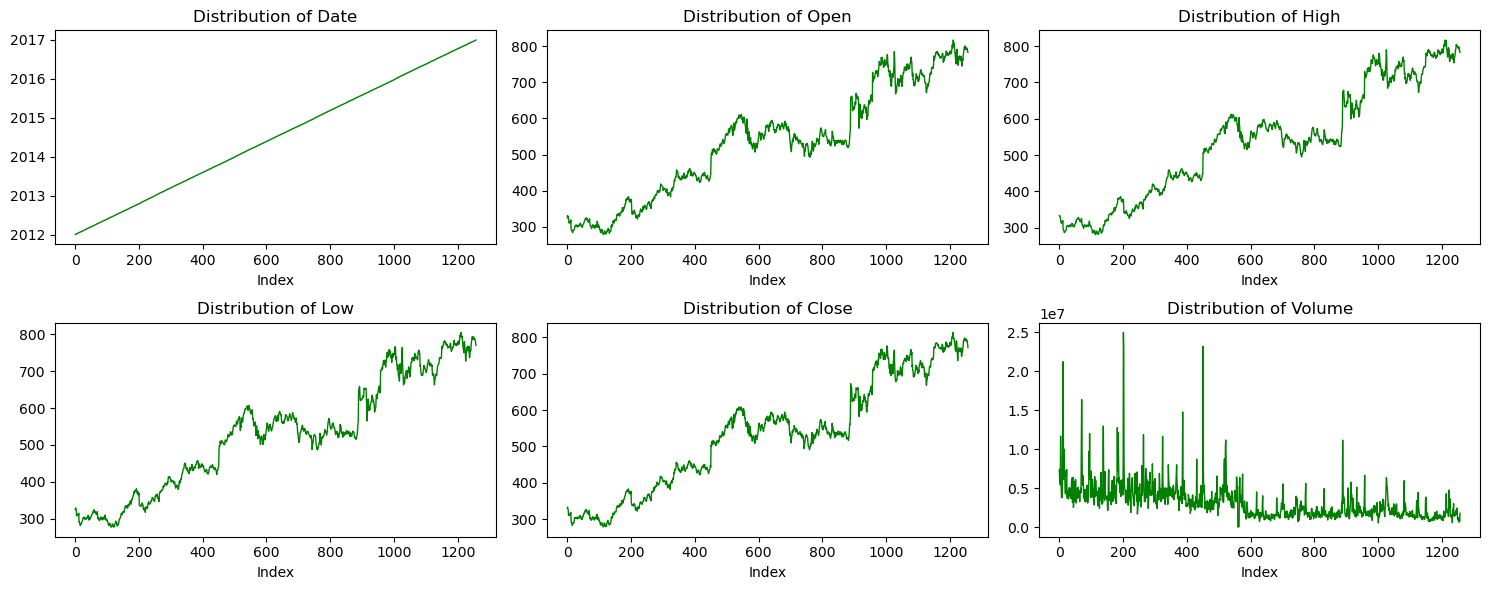

In [30]:
plt.figure(figsize = [15, 6])  # Adjusting the figure size for 2 rows and 3 columns

# Iterate through columns and create subplots
for i, col in enumerate(train_df.columns, 1):  # Update dataset to 'train_df'
    plt.subplot(2, 3, i)  # Create subplots with 2 rows and 3 columns
    sns.lineplot(data=train_df, y=col, x=train_df.index, color='green', linewidth=1)  # Set green color and thin line
    plt.title(f'Distribution of {col}')  # Set title for each subplot
    plt.ylabel('')  # Hide y-axis label
    plt.xlabel('Index')  # Label x-axis as Index

plt.tight_layout()  # Adjust subplots to fit in figure area
plt.show()



- Bullish Trend: The stock price has shown an overall increase.
- Volatility: There are fluctuations, but no major downward trends.
- Volume Declining: Interest in the stock may be decreasing, or the market is stabilizing.

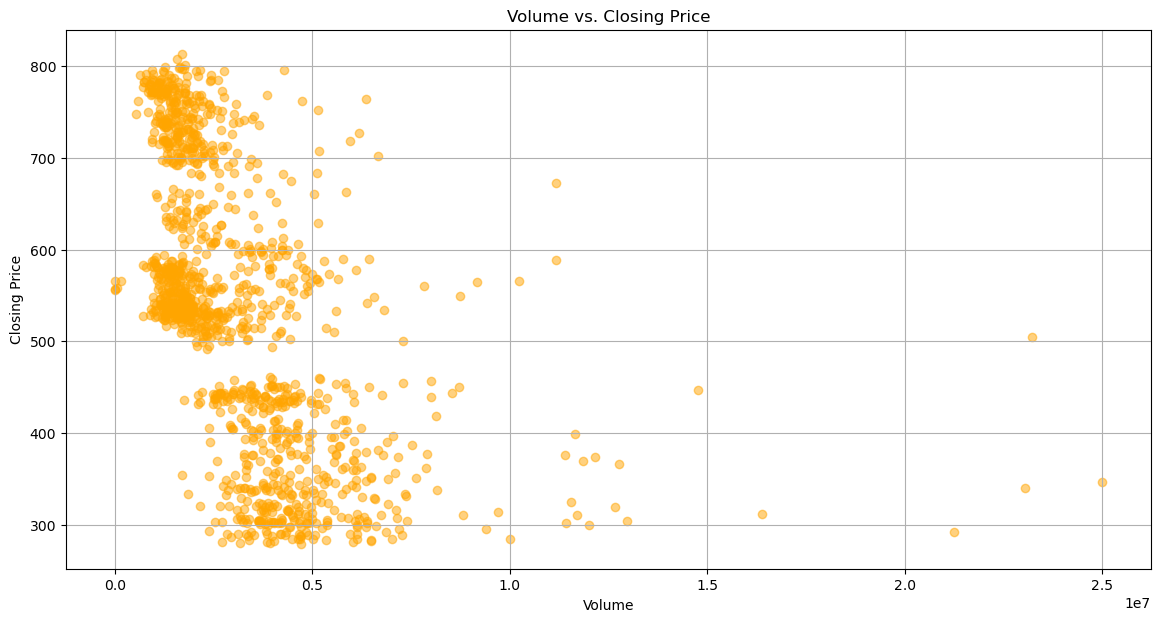

In [31]:
# Plot Volume vs. Close price
plt.figure(figsize=(14, 7))
plt.scatter(train_df['Volume'], train_df['Close'], color='orange', alpha=0.5)
plt.title('Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

- Volume does not directly drive price movements in this dataset.
- Most trading activity happens in the mid-price range ($300-$450).
- Higher stock prices are associated with lower trading volumes.

<a id="5"></a>
<h1 style='background:#1E3A5F; color:white; text-align:center; padding:10px; border-radius:10px;'>5. Building Model</h1> 



In [32]:
# Set index as Date

train_df.set_index('Date', inplace = True)
train_df.sort_index(inplace = True)


In [33]:
scaler = MinMaxScaler()
train_df = scaler.fit_transform(train_df)
train_df

array([[0.08581368, 0.09640129, 0.09044931, 0.09925143, 0.29525831],
       [0.09701243, 0.09834351, 0.09823458, 0.10192758, 0.22993592],
       [0.09433366, 0.09251685, 0.09408623, 0.09328156, 0.26361233],
       ...,
       [0.95725128, 0.95807422, 0.95844067, 0.9474876 , 0.04589107],
       [0.93796041, 0.94257381, 0.95033338, 0.94325816, 0.02949139],
       [0.93688146, 0.93669113, 0.93421352, 0.92272855, 0.07056868]])

In [34]:
print(np.isnan(train_df).sum(axis=0))

[0 0 0 0 0]


In [35]:
x_train = []
y_train = []

In [36]:
train_df.shape[0]

1258

In [37]:
time_steps = 5
for i in range (time_steps,train_df.shape[0]):
    x_train.append(train_df[i - time_steps:i])
    y_train.append(train_df[i,0])

In [38]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [39]:
x_train.shape,y_train.shape

((1253, 5, 5), (1253,))

In [40]:

model = Sequential()

# First Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(units=80, activation='relu', return_sequences=True), input_shape=(x_train.shape[1], 5)))
model.add(Dropout(0.2))

# Second Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(units=70, activation='relu', return_sequences=True)))
model.add(Dropout(0.2))

# Third Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(units=60, activation='relu', return_sequences=True)))
model.add(Dropout(0.2))

# Fourth Bidirectional LSTM Layer (No return_sequences since it's the last LSTM layer)
model.add(Bidirectional(LSTM(units=50, activation='relu')))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units=1))



In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 5, 160)              │          55,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 5, 140)              │         129,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 140)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 5, 120)              │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 120)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 100)                 │          68,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 349,381 (1.33 MB)

 Trainable params: 349,381 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer = 'adam', 
              loss = 'mean_squared_error')

In [43]:
model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - loss: 0.1439
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0067
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0048
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0047
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0040
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0039
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0029
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0032
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0031
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0031
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0028
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0029
Epoch 13/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0025
Epoch 14/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0023
Epoch 15/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - l

<a id="6"></a>
<h1 style='background:#1E3A5F; color:white; text-align:center; padding:10px; border-radius:10px;'>6. Prediction</h1> 



In [44]:
test_df = pd.concat([prev_data, test_df], axis = 0)
test_df.shape

(100, 6)

In [45]:
test_df['Date'] = test_df['Date'].apply(lambda x: pd.to_datetime(x, errors='coerce') if x != 'O' else pd.NaT)

In [46]:
# Conversion
test_df['Close'] = pd.to_numeric(test_df['Close'], errors='coerce')

# Removing , from str value to from Numeric
test_df['Volume'] = test_df['Volume'].astype(str).replace(',', '', regex=True)
# Conversion og Object to float
test_df['Volume'] = pd.to_numeric(test_df['Volume'], errors='coerce')

In [47]:
test_df.set_index('Date', inplace = True)
test_df.sort_index(inplace = True)

In [48]:
test_df.describe()

,Open,High,Low,Close,Volume
count,100.00000,100.000000,100.000000,100.00000,1.000000e+02
mean,784.39790,789.542000,778.396900,783.85930,1.651108e+06
std,19.09251,18.100471,19.368404,18.88226,7.087101e+05
min,744.59000,754.000000,727.540000,736.08000,5.874000e+05
25%,771.49000,775.802500,764.387500,770.43000,1.208825e+06
50%,782.19500,789.155000,775.935000,783.34000,1.476200e+06
75%,796.98000,803.122500,793.007500,796.51250,1.875675e+06
max,837.81000,841.950000,827.010000,835.67000,4.745200e+06


In [49]:
input_ = scaler.fit_transform(test_df)
input_

array([[0.3647286 , 0.29960205, 0.46285312, 0.39401546, 0.16424551],
       [0.27365372, 0.21876066, 0.32291143, 0.23677076, 0.31220838],
       [0.11306587, 0.18521887, 0.26600985, 0.3307561 , 0.17403435],
       [0.21336623, 0.13894258, 0.28410576, 0.237072  , 0.19423734],
       [0.16112422, 0.15554292, 0.31738213, 0.26518727, 0.1202559 ],
       [0.1963098 , 0.22512791, 0.32592742, 0.3582689 , 0.17261533],
       [0.26989916, 0.17907902, 0.37317784, 0.32935034, 0.35160421],
       [0.29854109, 0.22740193, 0.37096612, 0.29741942, 0.14079561],
       [0.26185368, 0.21978397, 0.41208405, 0.35475449, 0.09408822],
       [0.30111564, 0.26333144, 0.40977179, 0.40305252, 0.13959305],
       [0.37985411, 0.40761796, 0.51171207, 0.51340496, 0.21617201],
       [0.45054709, 0.39715748, 0.56911632, 0.5102922 , 0.19830199],
       [0.40924694, 0.32677658, 0.45772595, 0.38286977, 0.22747607],
       [0.33158121, 0.36372939, 0.47019202, 0.47123205, 0.13608158],
       [0.35679039, 0.31620239, 0.

In [50]:
x_test = []
y_test = []

for i in range(time_steps,input_.shape[0]):
    x_test.append(input_[i-time_steps:i])
    y_test.append(input_[i,0])

In [51]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape,y_test.shape

((95, 5, 5), (95,))

In [52]:
y_test

array([0.1963098 , 0.26989916, 0.29854109, 0.26185368, 0.30111564,
       0.37985411, 0.45054709, 0.40924694, 0.33158121, 0.35679039,
       0.39530144, 0.34048487, 0.31817207, 0.33726668, 0.37245226,
       0.3691268 , 0.37620682, 0.35528856, 0.451298  , 0.4201888 ,
       0.39294143, 0.39755417, 0.37770865, 0.46406351, 0.57552027,
       0.62980047, 0.54076378, 0.64696417, 0.7733319 , 0.6624115 ,
       0.60512766, 0.6839734 , 0.54580562, 0.41085604, 0.36054495,
       0.24308088, 0.06511478, 0.32085389, 0.41632697, 0.37921047,
       0.49967818, 0.12819138, 0.1181077 , 0.025531  , 0.11381678,
       0.23954087, 0.28727741, 0.19330616, 0.30079382, 0.24822999,
       0.21100622, 0.16530787, 0.28899378, 0.2733319 , 0.13784596,
       0.        , 0.14074233, 0.21604806, 0.17603519, 0.29918472,
       0.37985411, 0.43391976, 0.52896374, 0.56650933, 0.56586569,
       0.59869127, 0.48948723, 0.55964385, 0.54977473, 0.51244368,
       0.49678181, 0.4944218 , 0.52681828, 0.41557606, 0.40935

In [53]:
y_pred = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


In [54]:
scaler.scale_

array([1.07273117e-02, 1.13700966e-02, 1.00532824e-02, 1.00411688e-02,
       2.40511809e-07])

In [55]:
scale = 1 / 1.07273117e-02

y_pred = y_pred * scale
y_test = y_test * scale

<a id="7"></a>
<h1 style='background:#1E3A5F; color:white; text-align:center; padding:10px; border-radius:10px;'>7. Visualizing the Predictions</h1> 



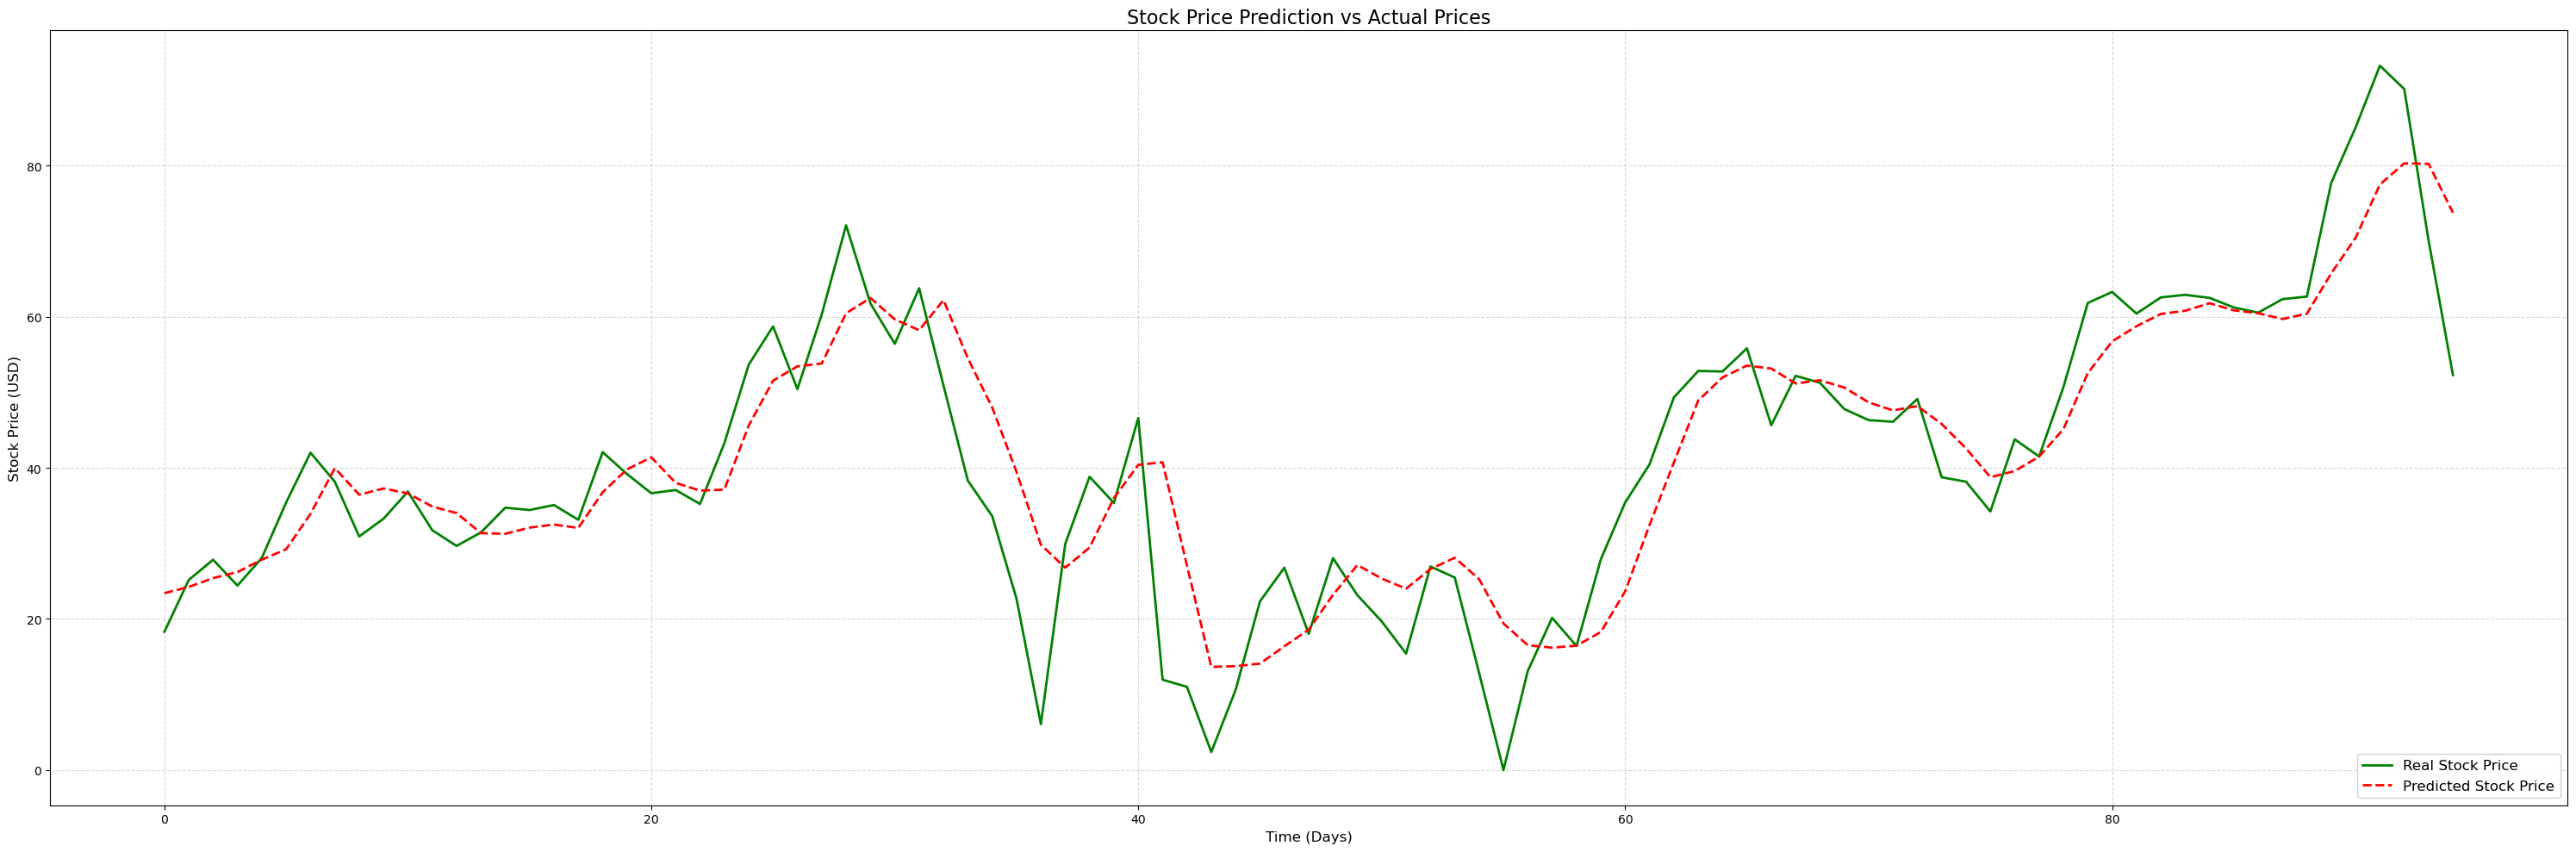

In [56]:
plt.figure(figsize = [30, 10])

plt.plot(y_test, color='green', label='Real Stock Price', linewidth=2)

plt.plot(y_pred, color='red', label='Predicted Stock Price', linestyle='--', linewidth=2)
plt.title('Stock Price Prediction vs Actual Prices', fontsize=16)
plt.xlabel('Time (Days)', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right', fontsize=12, framealpha=0.9)
plt.tight_layout()
plt.show()

<a id="8"></a>
<h1 style='background:#1E3A5F; color:white; text-align:center; padding:10px; border-radius:10px;'>8. Evaluating the Model</h1> 



In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_sc = r2_score(y_test, y_pred)

In [58]:
print(f"Mean square error : {mse}")
print(f"Mean Absolute error : {mae}")
print(f"R2 Score : {r2_sc}")

Mean square error : 67.29611876653644
Mean Absolute error : 5.928722784218472
R2 Score : 0.8113495449230022
